In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load the Dataset
# Replace the file path with the actual path to your downloaded CSV file
data = pd.read_csv('/content/tcc_ceds_music.csv')  # Metadata about songs and user interactions
data.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


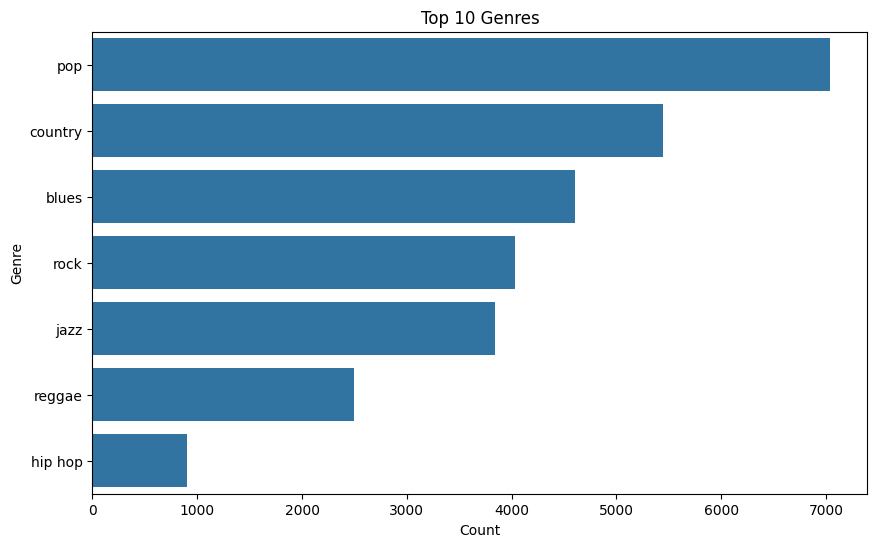

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
# Distribution of Songs by Genre
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=data, order=data['genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


<ipython-input-5-9ca4b1a2bd56>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


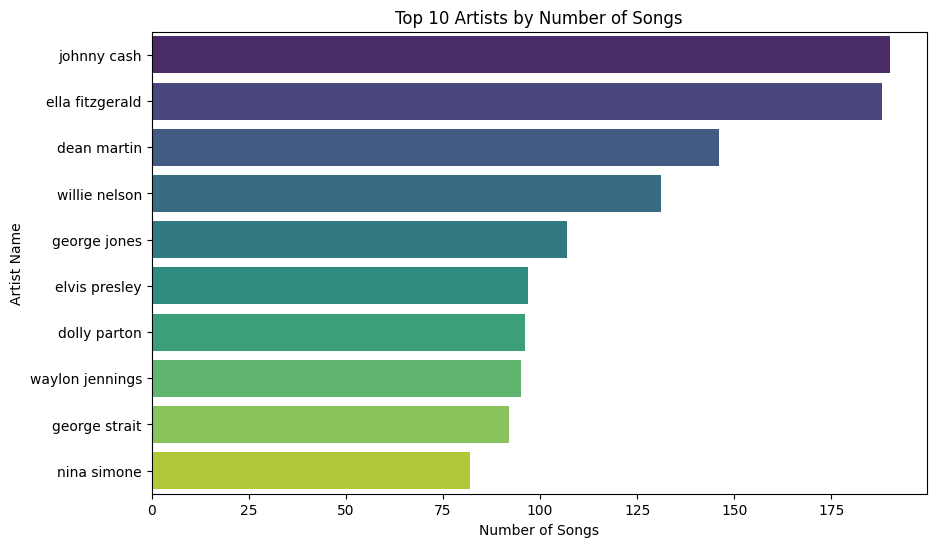

In [5]:
# Top Artists by Song Count
top_artists = data.groupby('artist_name').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

In [6]:
# Step 4: Preprocessing the Data
# Combine song metadata into a single feature for similarity computation
data['combined_features'] = (
    data['genre'].fillna('') + ' ' +
    data['artist_name'].fillna('') + ' ' +
    data['track_name'].fillna('')
)


In [7]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

In [8]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 5: Build the Recommendation Function
def get_recommendations(song_title, data, cosine_sim, top_n=10):
    # Get the index of the song that matches the title
    idx = data[data['track_name'] == song_title].index
    if len(idx) == 0:
        print("Song not found in the dataset.")
        return

    idx = idx[0]

    # Get similarity scores for all songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort songs based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N most similar songs
    sim_scores = sim_scores[1:top_n+1]  # Exclude the song itself
    song_indices = [i[0] for i in sim_scores]

    # Return recommended songs
    recommendations = data.iloc[song_indices]
    return recommendations

In [9]:
recommended_songs = get_recommendations('cry', data, cosine_sim, top_n=10)
print(recommended_songs[['track_name', 'artist_name', 'genre']])

                          track_name     artist_name  genre
56                         here am i     johnnie ray    pop
12887             keep on loving you  johnnie taylor  blues
15294              too many memories  johnnie taylor  blues
14542  there's nothing i wouldn't do  johnnie taylor  blues
14679                         lately  johnnie taylor  blues
13887                     steal away  johnnie taylor  blues
14701             don't make me late  johnnie taylor  blues
12881           baby, we've got love  johnnie taylor  blues
13247  i got to love somebody's baby  johnnie taylor  blues
12882            i need lots of love  johnnie taylor  blues


<ipython-input-10-c385a2c003d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='coolwarm')


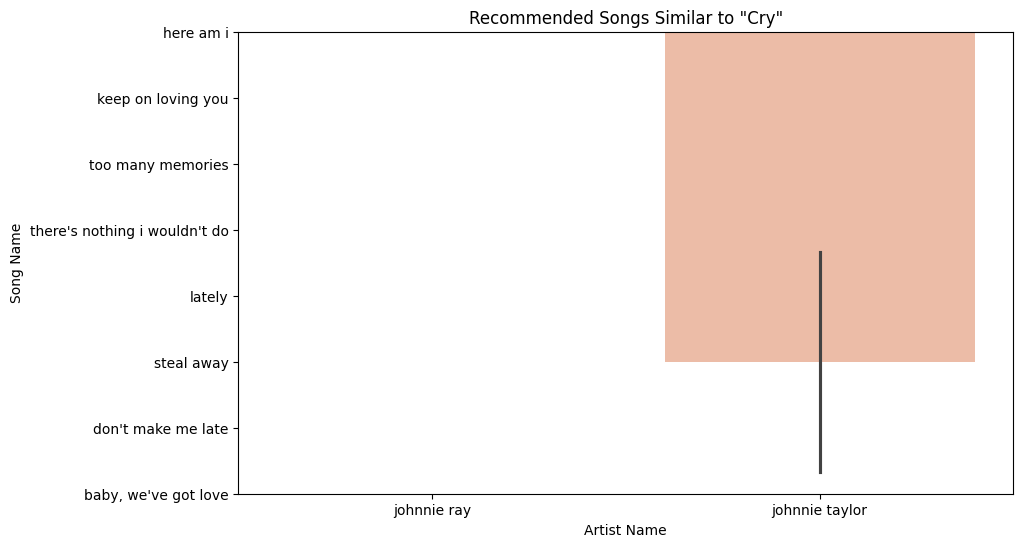

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='coolwarm')
plt.title('Recommended Songs Similar to "Cry"')
plt.xlabel('Artist Name')
plt.ylabel('Song Name')
plt.show()
